# EDA of Coffee Data


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# import data
coffee = pd.read_csv("../data/crop/coffee_output.csv")

In [3]:
# TODO: view first 5 rows of data
coffee.head()

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,Brazil,Minas Gerais,Arabica,16.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
1,Brazil,Espirito Santo,Arabica,2.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
2,Brazil,Espirito Santo,Robusta,7.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
3,Brazil,Sao Paulo,Arabica,3.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
4,Brazil,Parana,Arabica,0.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0


In [4]:
# TODO: describe numeric columns
coffee.describe()

,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
count,114.000000,114.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,8.812281,2012.552632,994.495413,5646.926606,298.055046,2146.513761,2639.027523,3345.082569
std,9.051550,6.265642,310.338484,372.684151,97.572559,96.699000,245.497999,175.124513
min,0.500000,2002.000000,466.000000,4465.000000,148.000000,2010.000000,2106.000000,3030.000000
25%,2.600000,2007.000000,679.000000,5640.000000,205.000000,2070.000000,2552.000000,3191.000000
50%,4.750000,2013.000000,1050.000000,5735.000000,307.000000,2135.000000,2679.000000,3415.000000
75%,12.175000,2018.000000,1185.000000,5810.000000,347.000000,2223.000000,2786.000000,3483.000000
max,34.800000,2023.000000,1510.000000,6200.000000,495.000000,2360.000000,3020.000000,3578.000000


In [5]:
# TODO: display the null values in dataframe
coffee.isna().sum()

country                         0
subdivision                     0
type                            0
60kgs_bag                       0
year                            0
nonbearing_trees                5
bearing_trees                   5
nonbear_hectares                5
bearing_hectares                5
bearing_trees_per_hectare       5
nonbearing_trees_per_hectare    5
dtype: int64

In [6]:
# TODO: drop null values
coffee.dropna(inplace=True)
coffee.isna().sum()

country                         0
subdivision                     0
type                            0
60kgs_bag                       0
year                            0
nonbearing_trees                0
bearing_trees                   0
nonbear_hectares                0
bearing_hectares                0
bearing_trees_per_hectare       0
nonbearing_trees_per_hectare    0
dtype: int64

In [7]:
# TODO: Select only Minas Gerais

coffee_mg = coffee[coffee["subdivision"] == "Minas Gerais"]
print(len(coffee_mg.index.values))

21


In [10]:
# TODO: BEGIN EDA! 5 questions
year_ticks = [2002, 2005, 2008, 2011, 2014, 2017, 2020, 2023]

## Analysis

**Question 1:** How is **bearing trees** changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

> Three main shifts can be seen. Accelerated growth (2002-2007). Plateau phase (2007-2020). New growth (2020-2023). Skewed-left histogram distribution.

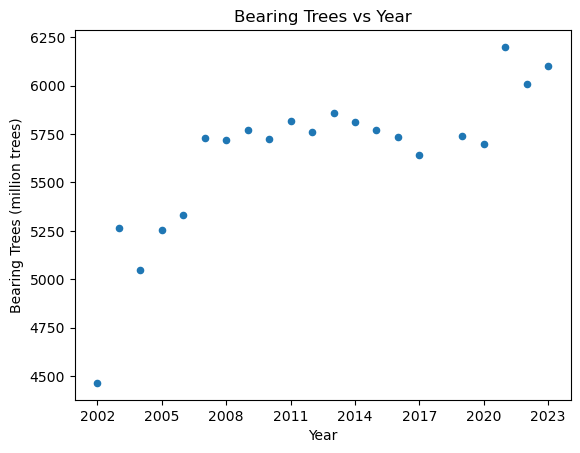

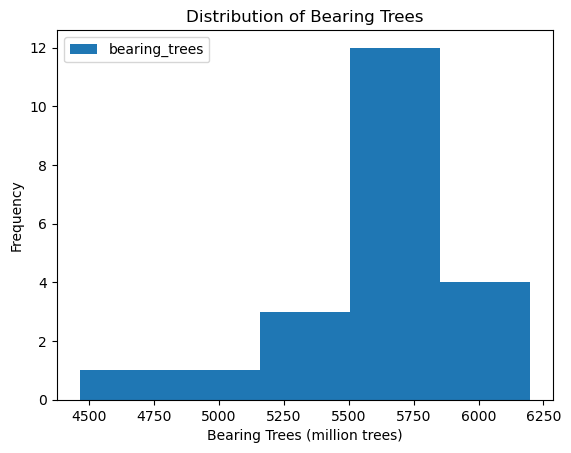

In [14]:
coffee_mg.plot(kind="scatter", x="year", y="bearing_trees")
plt.xlabel("Year")
plt.ylabel("Bearing Trees (million trees)")
plt.title("Bearing Trees vs Year")
plt.xticks(year_ticks)
plt.show()

coffee_mg.plot(kind="hist", y="bearing_trees", bins=5)
plt.xlabel("Bearing Trees (million trees)")
plt.ylabel("Frequency")
plt.title("Distribution of Bearing Trees")
plt.show()

**Question 2:** How is **bearing hectares** changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

> Two main shifts can be seen. Erratic growth (2002-2005). Steady decline (2005-2023). Skewed-right histogram distribution.

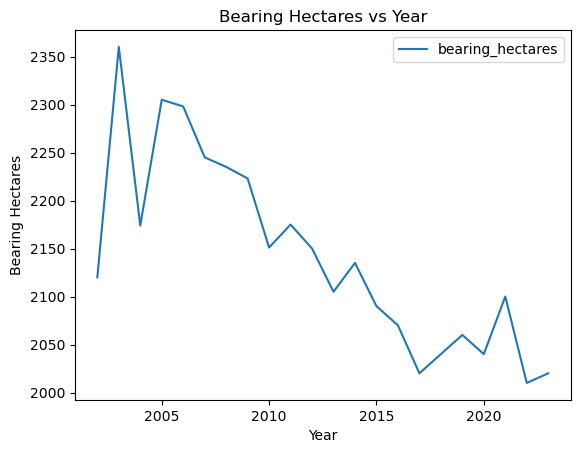

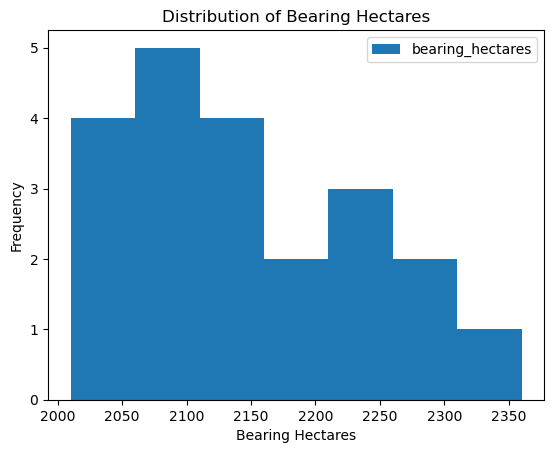

In [ ]:
coffee_mg.plot(kind="line", x="year", y="bearing_hectares")
plt.xlabel("Year")
plt.ylabel("Bearing Hectares (million trees)")
plt.title("Bearing Hectares vs Year")
plt.xticks(year_ticks)
plt.show()

coffee_mg.plot(kind="hist", y="bearing_hectares", bins=7)
plt.xlabel("Bearing Hectares (million trees)")
plt.ylabel("Frequency")
plt.title("Distribution of Bearing Hectares")
plt.show()

**Question 3:** How is the count of million **60kgs bags of coffee** changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

> Overall erratic growth. Histogram distribution is not normal and doesn't fit a known pattern.

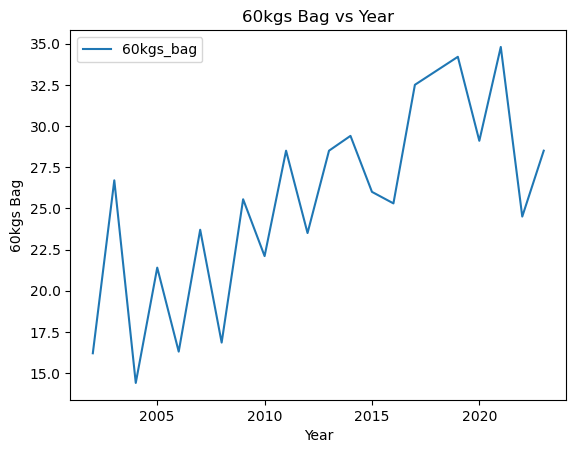

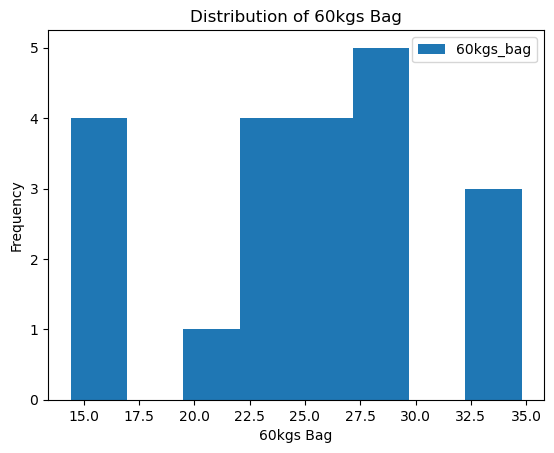

In [ ]:
coffee_mg.plot(kind="line", x="year", y="60kgs_bag")
plt.xlabel("Year")
plt.ylabel("60kgs Bag (million bags)")
plt.title("60kgs Bag vs Year")
plt.xticks(year_ticks)
plt.show()

coffee_mg.plot(kind="hist", y="60kgs_bag", bins=8)
plt.xlabel("60kgs Bag (million bags)")
plt.ylabel("Frequency")
plt.title("Distribution of 60kgs Bag")
plt.show()

**Question 4:** What is the relationship between **bearing_trees** and **60kgs_bag**? How *strong* is this relationship? Use pearson's correlation coefficient.

> Scatter plot has positive linear relationship. However, too few data points before 5500 million bearing trees, and too many deviations after this marker.
> Pearson coefficient of 0.65 is moderately positive but flawed. Skewed-left distribution for bearing trees. Roughly normal distribution for 60kgs bags though. Pearson coefficient assumes both variables are normally distributed.

0.6553434210069491


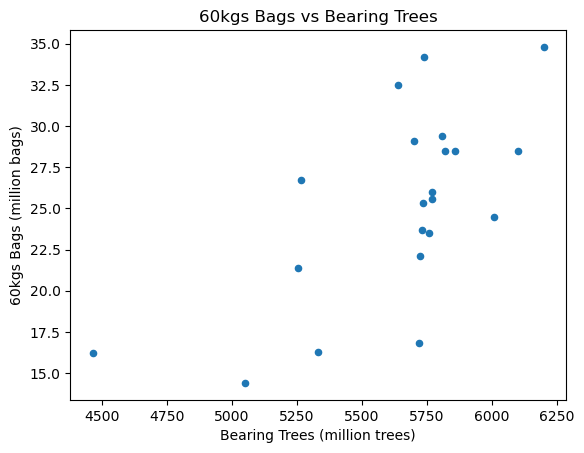

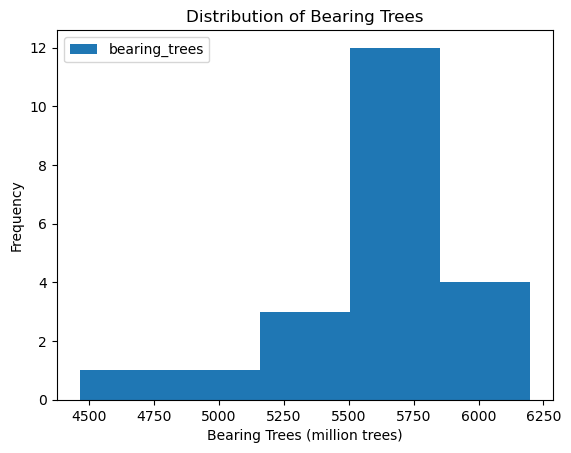

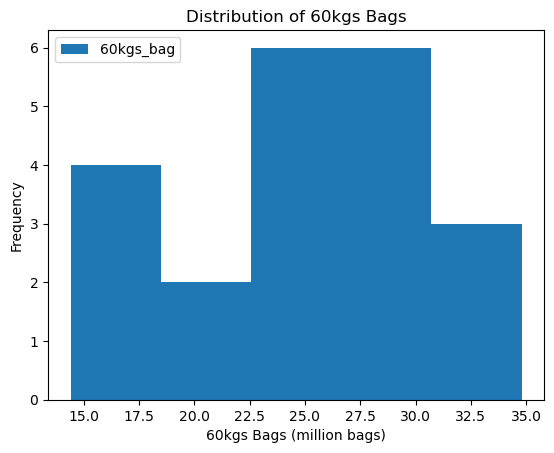

In [20]:
trees_bags = coffee_mg["bearing_trees"].corr(coffee_mg["60kgs_bag"])
print(trees_bags)

coffee_mg.plot(kind="scatter", x="bearing_trees", y="60kgs_bag")
plt.xlabel("Bearing Trees (million trees)")
plt.ylabel("60kgs Bags (million bags)")
plt.title("60kgs Bags vs Bearing Trees")
plt.show()

coffee_mg.plot(kind="hist", y="bearing_trees", bins=5)
plt.xlabel("Bearing Trees (million trees)")
plt.ylabel("Frequency")
plt.title("Distribution of Bearing Trees")
plt.show()

coffee_mg.plot(kind="hist", y="60kgs_bag", bins=5)
plt.xlabel("60kgs Bags (million bags)")
plt.ylabel("Frequency")
plt.title("Distribution of 60kgs Bags")
plt.show()

**Question 5:** What is the relationship between **bearing_hectares** and **60kgs_bag**? How *strong* is this relationship? Use pearson's correlation coefficient.

> Scatter plot has negative linear relationship. However, many deviations throughout trendline.
> Pearson coefficient of -0.48 is moderately negative but flawed. Skewed-right distribution for bearing hectares. Roughly normal distribution for 60kgs bags though. Pearson coefficient assumes both variables are normally distributed.

-0.48092018038906487


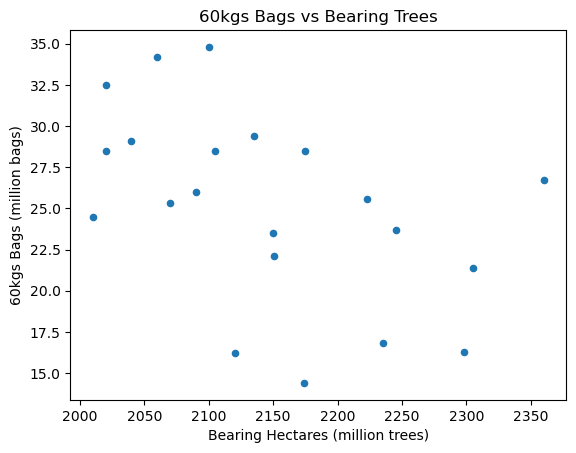

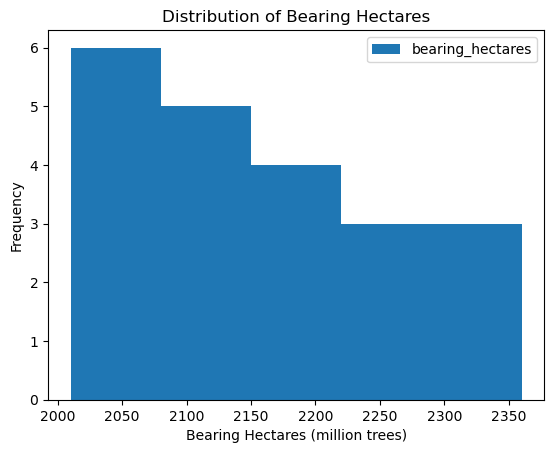

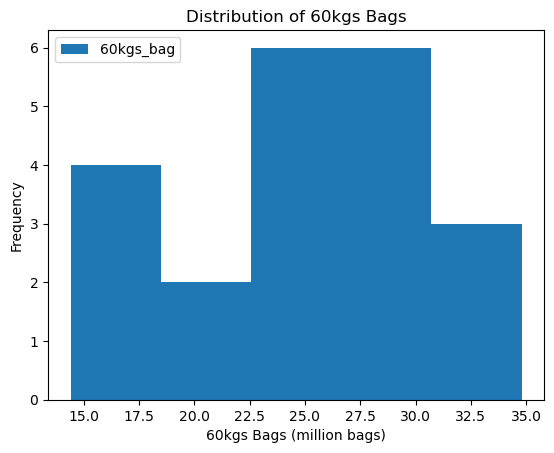

In [21]:
hectares_bags = coffee_mg["bearing_hectares"].corr(coffee_mg["60kgs_bag"])
print(hectares_bags)

coffee_mg.plot(kind="scatter", x="bearing_hectares", y="60kgs_bag")
plt.xlabel("Bearing Hectares (million trees)")
plt.ylabel("60kgs Bags (million bags)")
plt.title("60kgs Bags vs Bearing Trees")
plt.show()

coffee_mg.plot(kind="hist", y="bearing_hectares", bins=5)
plt.xlabel("Bearing Hectares (million trees)")
plt.ylabel("Frequency")
plt.title("Distribution of Bearing Hectares")
plt.show()

coffee_mg.plot(kind="hist", y="60kgs_bag", bins=5)
plt.xlabel("60kgs Bags (million bags)")
plt.ylabel("Frequency")
plt.title("Distribution of 60kgs Bags")
plt.show()